In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'axes.labelsize': 'large'
})

# Prehodni pojavi v električnih krogih

Ko opazujemo praznjenje kondenzatorja, je na začetku na kondenzatorju napetost

$$U_0 = \frac{U_n}{1 + \frac{R_0}{R}} U_n.$$

Stikalo nato razklenemo, tako da ostane le krog s kondenzatorjem in uporom $R$. Po Kirschoffovih zakonih zapišemo

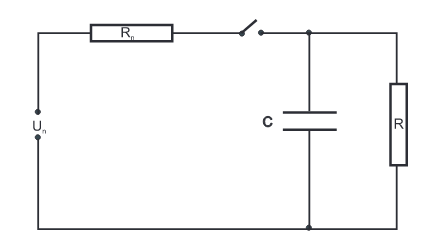

$$\frac{e}{C} - IR = 0.$$

Ker je tok $I$, s katerim se kondenzator prazni, kar $-\frac{de}{dt}$, je to diferencialna enačba

$$e + \tau\dot e = 0$$

v kateri je relaksacijski čas $\tau = RC$. Ko po drugi strani opazujemo polnjenje kondenzatorja, je v krogu stikalo najprej sklenjeno in na kondenzatorju ni napetosti. Skoraj identično, le z dodatno konstanto, velja diferencialna enačba

$$U_n - \frac{e}{C} - IR = 0.$$



Ker je tok v kondenzator $C\frac{dU}{dt}$, dobimo

$$U_n - U = \tau \dot U.$$

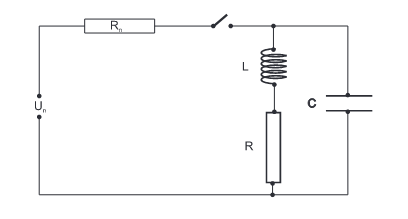

Dušeni nihajni krog dodatn vsebuje tuljavo in je nekoliko bolj kompleksen. A prav tako lahko uporabimo Kirschoffove zakone in zapišemo diferencialno enačbo.

$$\ddot U + 2\beta \dot U + \omega_0^2 U = 0,$$

v kateri je $\beta = \frac{R}{2L}$ in $\omega_0^2 = \frac{1}{LC}$.

## Namen

Z oscilosckopom opazovati polnjenje in praznjenje kondenzatorja. Izmeriti in izračunati relaksacijski čas iz znanih podatkov in ju primerjati. Opazovati dušeno nihanje električnega kroga. Izmeriti in izračunati frekvenco kroga, koeficient dušenja in začetni tok po krogu. 

## Pribor

Osciloskop, periodično stikalo, stikalna plošča, upori, kondenzator in tuljava na vtičnih podložkah, usmernik.

## Meritve

Prvo zapišemo lastnosti vira in elementov, ki jih bomo uporabljali v krogih.

In [87]:
U_n = 12
R, ΔR = 39e3, 0.1e3
C, ΔC = 0.23e-6, 0.02e-6
L, ΔL = 1.227, 0.005
R_L, ΔR_L = 137.1, 0.5

Sled na osciloskopu kaže, kako po izklopu stikala pada napetost na kondenzatorju. Poznamo tudi merilo, v katerem je sled izrisana. Pri tem moramo tudi upoštevati, da smo uporabili sondo, ki napetost 10-krat poveča.

<img src="falling.png" width=600>

Začetna napetost pred izklopom stikala je

In [3]:
U_0 = 2 * 1/5 * 31

Razberemo še nekaj vrednosti napetosti ob določenih časih.

In [4]:
fall_t = 2.5e-3 * 1/5 * np.array([
    0, 6.5, 11.5, 18, 23, 33, 43
])
fall_U = U_0 - 2 * 1/5 * np.array([
    0, 10, 15, 20, 22.5, 26, 28
])

<img src="rising.png" width=600>

Enako naredimo s sledjo polnjenja kondenzatorja.

In [5]:
rise_t = 2.5e-3 * 1/5 * np.array([
    0, 7.5, 12.5, 18.5, 23.5, 28.5, 33.5, 38.5, 43.5
])
rise_U = 2 * 1/5 * np.array([
    0, 10, 15, 19, 22, 24, 25.5, 26.5, 27.5
])

<img src="damped-1.png" width=600>

Pri dušenem nihanju iz sledi razberemo čase (glede na začetek sledi) in napetosti v minimumih in maksimumih. Tu spet upoštevamo, da smo uporabili sondo.

In [139]:
damp_t = 2.5e-3 * 1/5 * np.array([
    2, 6, 10, 14, 17.5, 21, 25, 28.5, 32, 35.5, 39, 42.5 
])
damp_U_abs = 5 * 1/5 * np.array([
    19.5, 14, 10, 7.5, 5.7, 4.5, 3.5, 3, 2.5, 2.2, 1.8, 1.5
])

## Račun

Prvo izračunamo faktor $\tau$ iz izmerjenega upora in kondenzatorja

In [7]:
τ = R*C
Δτ = np.sqrt((ΔR*C)**2 + (R*ΔC)**2)
1e3 * τ, 1e3 * Δτ

(8.97, 0.7803390288842408)

$$\tau = (9.0 \pm 0.8)\,\mathrm{ms}.$$

Rešitev enačbe pri praznjenju je eksponentno padanje naboja, s tem pa tudi napetosti

$$U = U_0 e^{-\frac{t}{\tau}}.$$

Da iz sledi razbranih časov in napetosti izluščimo faktor $\tau$, pogledamo premico

$$\ln \left( \frac{U}{U_0} \right) = -\frac{t}{\tau}.$$

Njen naklon je absolutno $\frac{1}{\tau}$.

In [8]:
fall_par, fall_cov = np.polyfit(fall_t, np.log(fall_U / U_0), 1, cov=True)
fall_τ = -1 / fall_par[0]
fall_σ_τ = np.sqrt(fall_cov[0,0]) / (fall_par[0]**2)
1e3 * fall_τ, 1e3 * fall_σ_τ

(9.233543289302894, 0.11104291377612037)

$$\tau = (9.2 \pm 0.1)\,\mathrm{ms}.$$

Prileganje si ogledamo še grafično. V logaritmični skali vidimo meritve, ki smo jih razbrali iz sledi in prilagajočo premico.

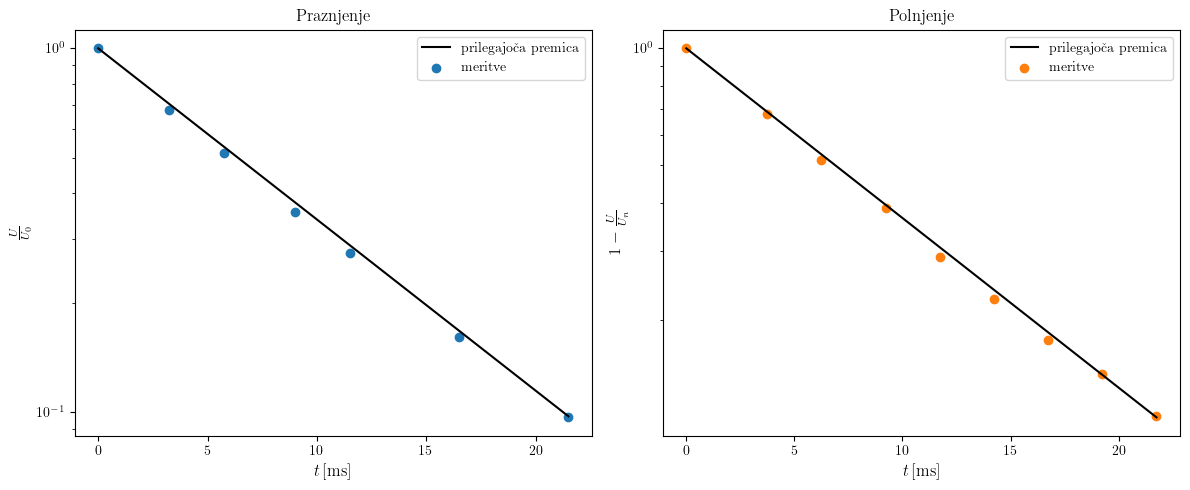

In [11]:
fig, axs = plt.subplots(1, 2, figsize=[12, 5])

axs[0].scatter(1e3 * fall_t, fall_U / U_0, label='meritve', color='tab:blue')
axs[0].plot(1e3 * fall_t, np.exp(-fall_t / fall_τ), label='prilegajoča premica', color='black')
axs[1].scatter(1e3 * rise_t, 1 - rise_U / U_0, label='meritve', color='tab:orange')
axs[1].plot(1e3 * rise_t, np.exp(-rise_t / rise_τ), label='prilegajoča premica', color='black')

axs[0].set_title('Praznjenje')
axs[0].set_yscale('log')
axs[0].set_xlabel(r'$t\,[\mathrm{ms}]$')
axs[0].set_ylabel(r'$\frac{U}{U_0}$')
axs[0].legend()
axs[1].set_title('Polnjenje')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$t\,[\mathrm{ms}]$')
axs[1].set_ylabel(r'$1 - \frac{U}{U_n}$')
axs[1].legend()
fig.tight_layout()

Za polnjenje kondenzatorja je rešitev enačbe eksponentno naraščanje napetosti

$$U = U_n \left( 1 - e^{-\frac{t}{\tau}} \right).$$

Ker je notranja upornost vira, ki posredno določa $U_0$, veliko manjša od upora $R$, je $U_n \approx U_0$. Vidimo lahko, da je to bolj natančno kot specifikacija izvora napetosti, 12 V, saj je $U_0$, ki ga razberemo iz osciloskopa, 12.4 V. Podobno kot prej torej pogledamo premico

$$\ln \left( 1 - \frac{U}{U_0} \right) = -\frac{t}{\tau},$$

in iz nje izračunamo $\tau$.

In [88]:
rise_par, rise_cov = np.polyfit(rise_t, np.log(1 - rise_U / U_0), 1, cov=True)
rise_τ = -1 / rise_par[0]
rise_σ_τ = np.sqrt(rise_cov[0,0]) / (rise_par[0]**2)
1e3 * rise_τ, 1e3 * rise_σ_τ

(9.945535594633736, 0.1278457655790896)

Tokrat dobimo faktor dušenja

$$\tau = (9.9 \pm 0.1)\,\mathrm{ms}.$$

Za nihajni krog je rešitev za napetost na kondenzatorju produkt sinusnega nihanja in eksponentnega pojemanja — dušenja. Če upoštevamo še robna pogoja $U_{t=0} = I_0 R$ in $\dot U_{t=0} = -\frac{I_0}{C}$. $I_0$ je tok, ki teče skozi tuljavo, preden prekinemo stikalo.

$$U = I_0 R e^{-\beta t} \left( \left( \frac{R}{2\omega L} - \frac{1}{\omega RC} \right) \sin(wt) + \cos(wt) \right),$$

izračunamo parametra $\beta$ in $\omega$

In [133]:
β = R_L / (2L)
Δβ = np.sqrt((ΔR_L / (2*L))**2 + (R_L / 2*L**2 * ΔL)**2)
β, Δβ

(111.73594132029339, 0.5547885674624908)

$$\beta = (55.9 \pm 0.6)\,\mathrm{s^{-1}}$$

In [92]:
ω_0 = np.sqrt(1 / (L*C))
Δ_ω_0 = np.sqrt((1 / (2*L**3*C)) * ΔL**2 + (1 / (2*L*C**3)) * ΔC**2)
ω_0, Δ_ω_0

(1882.408176662768, 115.87168181208128)

$$\omega_0 = (1.9 \pm 0.1)\,\mathrm{ms^{-1}}.$$

In [71]:
ω = np.sqrt(ω_0**2 - β**2)
ω, 1e3 * 2*np.pi / ω, 1e3 * 2*np.pi / ω**2 * Δ_ω_0

(1881.578941586338, 3.339315278413088, 0.3126876611365423)

Vidimo, da glede na druge napake dovolj natančno velja $\omega \approx \omega_0$, zato v nadaljevanju namesto $\omega$ uporabimo kar $\omega_0$. Iz lastnosti nihajnega kroga dobimo periodo

$$t_0 = (3.3 \pm 0.3)\,\mathrm{ms}.$$

Zdaj jo izračunamo še iz časov, ki smo jih razbrali na sledi.

In [15]:
t_0 = 2*np.diff(damp_t)
1e3 * np.mean(t_0), 1e3 * np.std(t_0)

(3.681818181818182, 0.2405228464604175)

Izmerjena periode je torej

$$t_0 = (3.7 \pm 0.2)\,\mathrm{ms}.$$

Iz sledi izračunamo še faktor dušenja. Tokrat gledamo premico

$$\ln\left( \frac{U}{U_1} \right) = -\beta(t - t_1),$$

pri čemer je $U_1$ napetost v prvem minimumu oz. maksimumu, t. j. ob času $t_1$.

In [138]:
t_1, U_1 = damp_t[0], damp_U_abs[0]
damp_par, damp_cov = np.polyfit(damp_t - t_1, np.log(damp_U_abs / U_1), 1, cov=True)
damp_β, damp_σ_β = -damp_par[0], np.sqrt(damp_cov[0,0])
damp_β, damp_σ_β

(123.35295788725327, 4.9066501998779115)

Tako dobimo koeficient

$$\beta = (123 \pm 5)\,\mathrm{s^{-1}},$$

ki pa se ne ujema z izračunanim. Sklepam, da je napaka v izračunani vrednosti, in sicer zaradi napačne, okoli 2-krat premajhne vrednosti upora. Ta dodaten upor $R_D$ se skriva v kondenzatorju ali preprosto v žicah in slabih stikih.

$$R_D = 2\beta L - R_L.$$

In [155]:
R_D = 2*damp_β*L - R_L
R_D

165.60815865531956

128.24746787307683

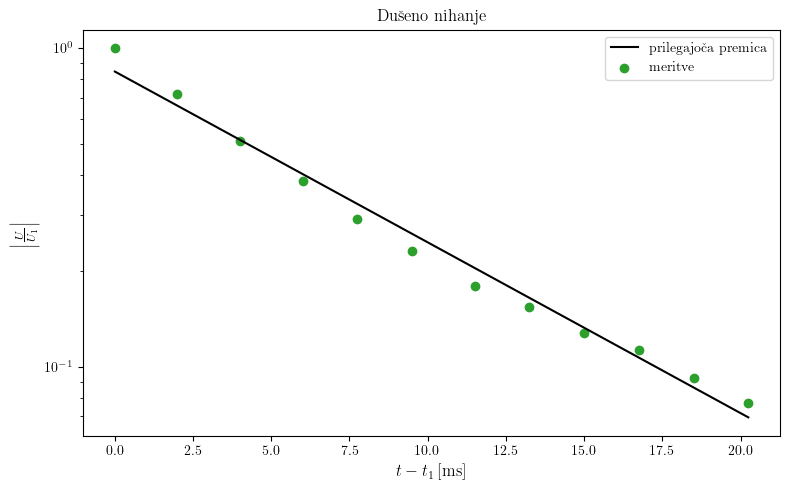

In [143]:
fig, ax = plt.subplots(1, 1, figsize=[8, 5])

t_1, U_1 = damp_t[0], damp_U_abs[0]
ax.scatter(1e3 * (damp_t - t_1), damp_U_abs / U_1, label='meritve', color='tab:green')
ax.plot(1e3 * (damp_t - t_1), np.exp(-damp_β * (damp_t - t_1) + damp_par[1]), label='prilegajoča premica', color='black')

ax.set_title('Dušeno nihanje')
ax.set_yscale('log')
ax.set_xlabel(r'$t - t_1\,[\mathrm{ms}]$')
ax.set_ylabel(r'$\left| \frac{U}{U_1} \right|$')
ax.legend()
fig.tight_layout()
np.log(19.5/1.5) / 20e-3

Zdaj lahko začetno napetost izračunamo kot $U_0 = U_1 e^{\beta t_1}$.

In [162]:
U_0 = U_1 * np.exp(damp_β*t_1)
σ_U_0 = U_1 * t_1 * np.exp(damp_β*t_1) * damp_σ_β
U_0, σ_U_0

(22.060031096494967, 0.10824085598892998)

$$U_0 = (22.1 \pm 0.1)\,\mathrm{V}$$

Začetni tok pa je preprosto $\frac{U_0}{R_L + R_D}$.

In [165]:
1e3 * U_0 / (R_L + R_D), 1e3 * σ_U_0 / (R_L + R_D)

(72.87557492500146, 0.3575749542719761)

$$I_0 = (72.8 \pm 0.4)\,\mathrm{mA}$$